# Model Tuning

In the previous notebooks, I tested different models for their general performance on the dataset. After that, I performed different methods of feature selection on the data. 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, make_scorer, accuracy_score

from sklearn.ensemble import RandomForestClassifier

## Data Import

In [19]:
data = pd.read_csv('data/fetal_health.csv')

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [21]:
data.shape

(2126, 22)

In [22]:
# drop columns identified to double information
data.drop(columns=['histogram_mean', 'histogram_median', 'histogram_width'], inplace=True)

In [23]:
# drop columns identified for low variance
data.drop(
    columns=[
        "baseline value",
        "abnormal_short_term_variability",
        "histogram_min",
        "histogram_max",
        "histogram_mode",
        "prolongued_decelerations",
        "severe_decelerations",
    ],
    inplace=True
)

In [24]:
data.shape

(2126, 12)

## Feature Definition and Selection

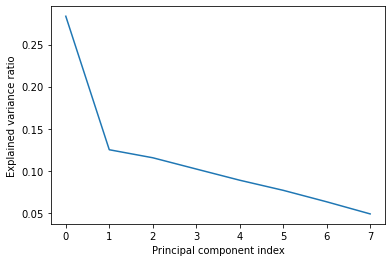

(2126, 11)
8 components selected
Components: [[ 0.16  0.11  0.24  0.41  0.47 -0.34 -0.03  0.39  0.22  0.43 -0.02]
 [ 0.06  0.09 -0.22 -0.24  0.05 -0.18  0.67  0.23  0.31 -0.18  0.47]
 [-0.68  0.01 -0.2   0.35 -0.01  0.46 -0.02  0.12  0.33  0.14  0.16]
 [ 0.22  0.71 -0.49 -0.08 -0.05  0.16 -0.25  0.22 -0.19  0.16  0.07]
 [-0.39  0.42  0.05 -0.07  0.13 -0.15  0.46 -0.13 -0.13  0.01 -0.62]
 [ 0.24 -0.28 -0.45 -0.16  0.03  0.06 -0.08  0.13  0.54 -0.01 -0.56]
 [ 0.09  0.46  0.47 -0.14 -0.2   0.07 -0.18 -0.25  0.62 -0.12  0.03]
 [ 0.07 -0.07  0.43 -0.35 -0.05  0.52  0.15  0.58 -0.13  0.1  -0.14]]
Explained Variance Ratio: [0.2836893  0.12502496 0.11549359 0.10210336 0.08879883 0.07679589
 0.06314869 0.04874974]
Cumulative Sum of Explained Variance Ratios: [0.2836893  0.40871427 0.52420785 0.62631121 0.71511004 0.79190592
 0.85505461 0.90380435]
FEATURE EFFECTS---------------------------------------
PC 1 effects = {'accelerations': 0.16, 'fetal_movement': 0.11, 'uterine_contractions': 0.24, '

In [35]:
X = data.drop(columns=['fetal_health'])
y = data["fetal_health"]

pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reducer", PCA(n_components=0.9))
])

pca_cols = X.columns
pca_pipe.fit(X)

var = pca_pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

plt.show()
print(X.shape)
print(f'{len(pca_pipe["reducer"].components_)} components selected')
print(f'Components: {pca_pipe["reducer"].components_.round(2)}')
print(f'Explained Variance Ratio: {pca_pipe["reducer"].explained_variance_ratio_}')
print(f'Cumulative Sum of Explained Variance Ratios: {pca_pipe["reducer"].explained_variance_ratio_.cumsum()}')

vectors = pca_pipe["reducer"].components_.round(2)

# Print feature effects
print("FEATURE EFFECTS---------------------------------------")
print("PC 1 effects = " + str(dict(zip(pca_cols, vectors[0]))))
print("PC 2 effects = " + str(dict(zip(pca_cols, vectors[1]))))
print("PC 3 effects = " + str(dict(zip(pca_cols, vectors[2]))))
print("PC 4 effects = " + str(dict(zip(pca_cols, vectors[3]))))
print("PC 5 effects = " + str(dict(zip(pca_cols, vectors[4]))))
print("PC 6 effects = " + str(dict(zip(pca_cols, vectors[5]))))
print("PC 7 effects = " + str(dict(zip(pca_cols, vectors[6]))))
print("PC 8 effects = " + str(dict(zip(pca_cols, vectors[7]))))

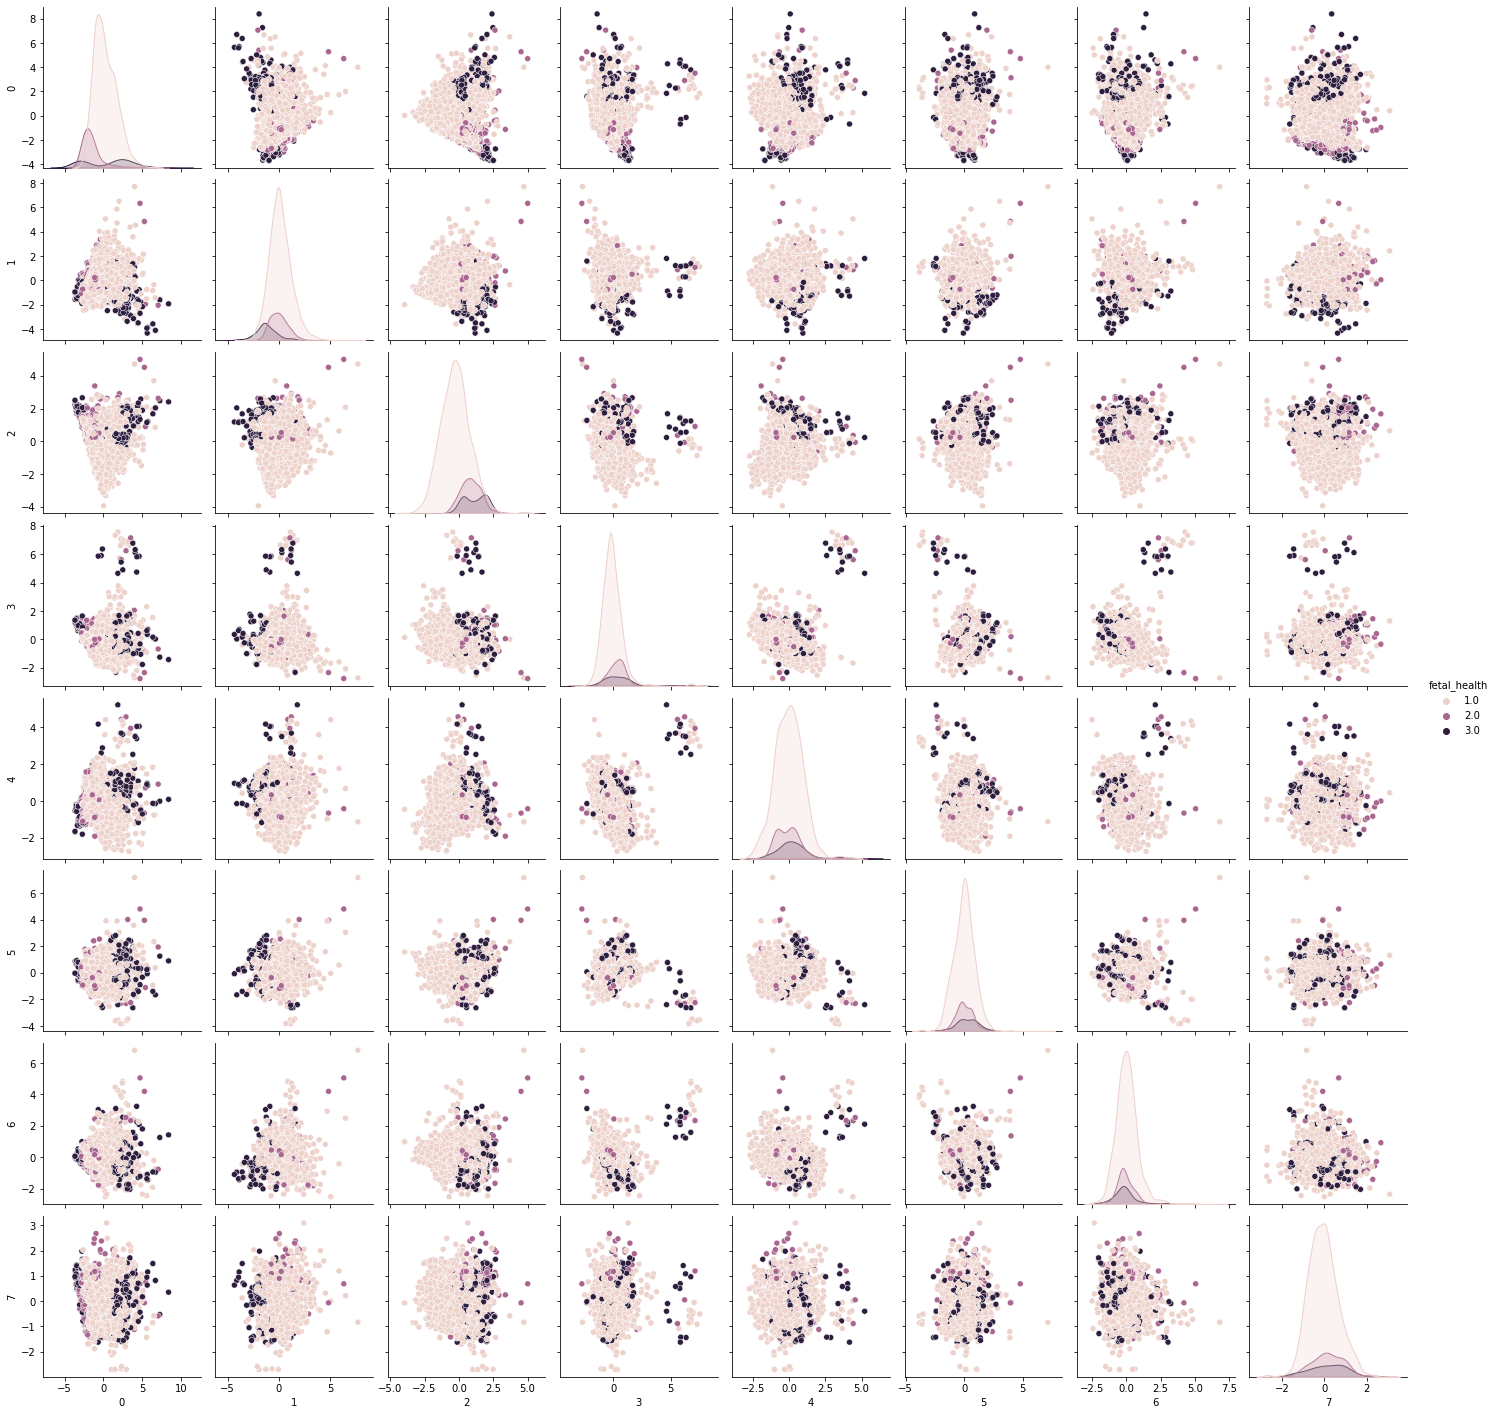

array([0.2836893 , 0.40871427, 0.52420785, 0.62631121, 0.71511004,
       0.79190592, 0.85505461, 0.90380435])

In [27]:
pca_df = pca_pipe.fit_transform(X)
pca_df = pd.DataFrame(pca_df)
pca_df = pca_df.join(data["fetal_health"])

sns.pairplot(pca_df, hue="fetal_health")
plt.show()

In [42]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("reducer", PCA(n_components=0.9)),
        ("classifier", RandomForestClassifier(random_state=42))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe["reducer"].explained_variance_ratio_)
print(f"{accuracy:.1%} test set accuracy")


[0.28124331 0.12616964 0.11287943 0.10144449 0.09042924 0.07759533
 0.06450004 0.04921723]
87.6% test set accuracy


## Model Tuning

In the previous notebook, a "simple" RandomForestClassifier and XGBoost were among the best performing algorithms to be used on this dataset.

In [59]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("reducer", PCA(n_components=0.9)),
        ("classifier", RandomForestClassifier(random_state=42))
    ]
)

def classification_report_with_accuracy_score(y_true, y_pred):
 # custom scorer to get both classification report and acc score
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

scores = cross_val_score(pipe, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

pipe.fit(X_train, y_train)
# Prints the explained variance ratio and accuracy
print(f'Explained Variance Ratio {pipe["reducer"].explained_variance_ratio_}')
print(f'Cumulative Sum of Explained Variance Ratio {pipe["reducer"].explained_variance_ratio_.cumsum()}')
print('Maximum Score: ', scores.max())
print('Minimum Score: ', scores.min())
print('Mean Score: ', scores.mean())



              precision    recall  f1-score   support

         1.0       0.87      0.90      0.89       165
         2.0       0.33      0.30      0.32        30
         3.0       0.80      0.67      0.73        18

    accuracy                           0.80       213
   macro avg       0.67      0.62      0.64       213
weighted avg       0.79      0.80      0.79       213

              precision    recall  f1-score   support

         1.0       0.93      0.92      0.93       165
         2.0       0.54      0.63      0.58        30
         3.0       1.00      0.83      0.91        18

    accuracy                           0.87       213
   macro avg       0.83      0.80      0.81       213
weighted avg       0.88      0.87      0.88       213

              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       165
         2.0       0.60      0.83      0.69        30
         3.0       0.71      0.28      0.40        18

    accuracy        

In [ ]:
## TODO: #4 Hyperparameter Optimization for RFC using Grid Search
